<h1 style = 'color: #AA00FF; text-align: center'> 
    Analytic Model: Verification with Monte Carlo Simulations
</h1>
<br>
<hr>
<span style = 'color:yellow;'> Important❕ </span> <span style = 'color:lightgreen;'> This is one of the two remaining notebook with implementation of Simple Analytic Model V1.0</span>
<hr>
$$
LCE = \frac{f_{sen}FF_{sys}(1-R)}{1-( f_{sen}R + (1-f_{sen})R_{wall} )}
$$

<p style = 'text-align: left; font-size:22px; color: yellow' >     
    Notes:
</p>
<p style = 'text-align: left; font-size:22px; color: lightyellow' > 
    <br>
    1. LY is light collection convolved with Scintillation yield and Photon Detection Efficiency, i.e,
    <br>
    <p style = 'text-align: center; font-size:22px; color: #00FFFF'> 
    Light Yield =  Scintillation Yield * Light Collection Efficiency * PDE
    </p>
    <br>
    <p style= "text-align: left; font-size:22px;  color: lightyellow">
    2. Scintillation Yield = 40 photons/keV (fixed for Liquid Argon)
    <br>
    </p>
    <p style = 'text-align: left; font-size:22px;  color: lightyellow'>
        3. wavelengths in nm throughout this notebook
    <br>
    4. reflectivity represented as a decimal
    </p>
    <p style = 'color: yellow; font-size:22px;'> Important : </p>  
    <p style = 'color: white; font-size:22px;  color: lightyellow'>
    In this notebook we are refering to Light Collection Efficiency convolved with PDE as Light Yield. To get actual Light Yield (as implemented for plotting) we multiply by Scintillation Yield.
</p>
    <br>
<p style = 'color:tomato; font-size:22px;'> 
    Relevant Documentation: 
<a href="https://www.overleaf.com/read/vpkvkgpfqwst">https://www.overleaf.com/read/vpkvkgpfqwst</a>
</p>

<h2 style = 'color:#f31567; text-align: center'>
    <body>⭐⭐⭐⭐⭐ </body>
4th July configuration as instructed by Cenk Torkoglu
</h2>
<body>
        Changes to configuration:
        <br>
           1. New Reflectance values for SiPM
        <br>
            1.(a) SiPM reflectance is scaled by 0.91 in order to account for antireflecting coatig in Liquid Argon.
        <br>
            2. FBK PDE 
        <br>
            3. PDE correction: multiply by all values by 40/52.77
        <br>
            4. Ensure PEN efficiency: 47.2 %

</body>
<p>
        <span style = 'color: #FF6611; font-size: 18px'> Note: </span> Editing History: copied and modified cells from Ananlytic Model Light Yield Notebook. 
    <br>
    This notebook should be used for all future purposes as much of the clutter has been removed.
 </p>

<h2 style = 'text-align:center'>
    <span style = 'color: Orange '>⭕ Integration over the relevant Wavelength range with Cenk's configurations</span>
</h2>

In [1]:
from os import path
import matplotlib.pyplot as plt
# %matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

<p> 
    <span style = 'color: #FF00AA; font-size: 18pt'>⭕ To Load Data : </span>
    <br>
    1. Give location of project directory defined by variable project_dir.
    <br>
    2. Inside the project directory, a folder named 'Data' should contains all the relavant data files
</p>

In [2]:
### define project directory

# project_dir = r'C:\Users\sarth\OneDrive\one_work\LY_Analytic_Model'
project_dir = r'C:\Users\sarth\projects\LY_Analytic_Model'

<h2> 
    <span style = 'color: slateblue'> ⭕ Wavelength Range </span> 
</h2>

In [3]:
## Question: how to choose common wavelength region to be used for ,full fledge calcualtion
## Answer: check all data and find out the common range
from numpy import arange
# wavelength_vector = arange(305, 560, 0.5) ### for PDE data given by Marcin
wavelength_vector = arange(366, 560, 0.5) ### for PDE data for new generation SiPM given by cenk

<h2 style = 'text-align: left'>
    <span style = "color : slateblue"> ⭐ SiPM Reflectance data </span>
</h2>
<p>
    SiPM Reflectance .dat file provided by Cenk
    <br>
    <span style = 'color: #FF6611; font-size: 18px'> Note: </span> SiPM Reflectance is multiplied by 0.91 to take care of the effect of antireflective coating in Liquid Argon chamber (needs further investigtation)
</p>

In [4]:
cenk_SiPM_R_df = (pd.read_csv(path.join(project_dir, 'Data','SiPM_ref.csv'), sep = ',') )
# cenk_SiPM_R_values = cenk_SiPM_R_vector.copy()
# cenk_R_SiPM_values['R'] = [int(value)/100 for value in cenk_R_SiPM_vector['R']]
cenk_SiPM_R_df2 = cenk_SiPM_R_df.copy()
cenk_SiPM_R_df2['LAr_equivalent_Reflectance'] = cenk_SiPM_R_df2['R']*0.91 

### Note: SiPM is coated with an unknown anti-reflection coating
### 0.91 : To get the unknown reflectivity of SiPM in Liquid Argon. Since SiPM is also coated with an anti reflection coating, getting the equivalent 
### reflectance is not straight forward. 0.91 is based on an educated guess.

cenk_SiPM_R_df2['wavelength'] = 1239.847/cenk_SiPM_R_df2['E'] # Eneergy unit eV wavlength Unit: nm
# SiPM_ref.dat
# cenk_SiPM_R_df3 = cenk_SiPM_R_df2.sort_values(by = 'wavelength')

In [5]:
cenk_SiPM_R_df2.head()

,E,R,LAr_equivalent_Reflectance,wavelength
0,1.127091,0.261917,0.238344,1100.041700
1,1.128116,0.261166,0.237661,1099.041662
2,1.129144,0.260545,0.237096,1098.041624
3,1.130173,0.259940,0.236545,1097.041587
4,1.131204,0.259005,0.235695,1096.041549


In [6]:
# plt.figure()
# plt.plot(cenk_SiPM_R_df2['wavelength'], cenk_SiPM_R_df2['R'])

<h2 style = 'text-align: left'>
    <span style = "color : slateblue"> ⭐ SiPM PDE data </span>
</h2>
<p>
    Using FBK PDE values
    <br>
    Normalizing with 40/52.77
</p>

In [7]:
### FBK Values sent by cenk
photon_wavelegnth = [285.87, 301.14, 320.99, 340.83, 365.26, 380.53, 391.22, 400.38, 411.06, 420.22, 435.49, 449.23, 464.50, 499.61, 588.16, 698.09]
PDE_vector = [18.39, 37.24, 41.87, 42.43, 45.03, 48.12, 52.72, 52.75, 52.77, 52.29, 48.77, 46.26, 40.71, 38.76, 28.82, 18.93] # %age values
PDE_normalized_vector = []
### Normalizing PDE values in FBK data as instructed by Cenk
PDE_normalized_vector = [value*40/max(PDE_vector) for value in PDE_vector]
### PDE_normalized_vector
norm_PDE_values = [value/100 for value in PDE_normalized_vector]

### LFoundry PDE Values sent by Cenk
# photon_wavelegnth = [365.39, 390.34, 399.89, 409.98, 420.06, 434.93, 450.32, 500.21, 525.16, 545.33, 590.98, 630.25, 700.32]
# PDE_vector = [43.277, 51.892, 54.257, 52.399, 50.709, 46.993, 42.601, 36.014, 30.439, 28.581, 24.358, 20.473, 15.574]
### Normalization for PDE values 
# norm_PDE_values = [value/100 for value in PDE_vector]


frame = {'photon_wavelegnth':photon_wavelegnth, 'PDE_norm': norm_PDE_values}

PDE = pd.DataFrame(frame)

# max(PDE['PDE_norm'])
# PDE

<h2 style= 'color: slateblue'>
   ⭐ PEN Reflectance Data 
</h2>
<p>
<span style= 'color: red; font-size : 22px'>  Needs verification !!! </span>
</p>

In [8]:
## R_wall_PEN = 
photon_energy = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,
2.884,2.918,2.952,2.988,3.024,3.039,3.047,3.054,3.062,3.069,3.077,3.085,3.092,3.100,3.108,3.116,3.123,3.131,3.139,3.147,3.155,
3.163,3.171,3.179,3.188,3.196,3.204,3.212,3.221,3.263, 8.0] ## energy in eV

PEN_reflectance = [100.130, 100.130,99.995,99.856,99.681,99.659,99.569,99.351,99.306,99.018,98.652,98.415,98.283,
98.018,97.856,97.606,97.457,97.134,96.928,96.827,96.247,95.737,95.359,95.197,95.048,94.876,94.684,94.463,94.055,93.650,93.147,
92.562,91.812,90.904,89.807,88.506,86.957,85.242,83.156,80.678,77.811,74.615,71.004,67.089,62.924,58.670,20.000, 20.000] ## %age reflectance

PEN_reflectance = [reflectance*0.98/100 for reflectance in PEN_reflectance] 
# PEN_reflectance = [reflectance*0.98*0.994/100 for reflectance in PEN_reflectance] 

### Reflectance is multiplied by 0.98 and 0.994 for calibration purpose:
    ### 1. 0.98 is the reflectance of Basrium Sulphate used as the standard in photo spectrometer
    ### 2. The second factor is specific to 2PAC. 0.994 is the coverage fraction of Wavelength Shifting material (a small surface coverage is lost to holes, bolts etc in 2PAC)
### The calculation is very senstitive to Reflectance


photon_wavelength = []

for energy_ in photon_energy:
    length_ = 1239.847/energy_
    photon_wavelength.append(length_)

frame = {'photon_wavelength': photon_wavelength,
        'PEN_reflectance': PEN_reflectance}

R_Wall_PEN = pd.DataFrame(frame)

## reverse the order of wavelength smaller to bigger
R_Wall_PEN = R_Wall_PEN.iloc[::-1]

# R_Wall_PEN

<h2> <span style = "color : slateblue"> ⭕ PEN Emission Spectrum </span> </h2>

In [9]:
# r_PEN = r'D:\D Downloads\Current_work\pen-tess.txt'
r_PEN = path.join(project_dir, 'Data', 'pen-tess.txt')
emission_spectrum_PEN = pd.read_csv(r_PEN, sep ='\t')

E_PEN = emission_spectrum_PEN.drop(['a','b','c'], axis=1)

# E_PEN

# normalize : divide by maximum value
E_PEN['efficiency'] = E_PEN['efficiency']/max(E_PEN['efficiency'] ) 

# remove negative values
E_PEN = E_PEN[E_PEN > 0].dropna()
# E_PEN['efficiency']
## What are the units of efficiency? Normalize PEN Spectrum ??
## Remove negative values?
## Need linear interpolation for everyuthing R, R_Wall, PDE and emission spectrum

## <span style = 'color : slateblue'> ⭐ TPB Reflectance data </span>

In [10]:
photon_energy = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,2.884,2.918,2.952,2.988,3.024, 3.221,3.263, 8.0]
TPB_reflectance = [98.936,98.936,99.180,99.309,99.375,99.392,99.534,99.490,99.491,99.685,99.635,99.593,99.541,99.457,99.380,99.374,99.196,98.924,98.521,97.653,95.581,92.569,13.0,3.0,3.0]

photon_wavelength = []

TPB_reflectance = [reflectance*0.98/100 for reflectance in TPB_reflectance]
# TPB_reflectance = [reflectance*0.98*0.994/100 for reflectance in TPB_reflectance]

### Reflectance is multiplied by 0.98 and 0.994 for calibration purpose:
    ### 1. 0.98 is the reflectance of Basrium Sulphate used as the standard in photo spectrometer
    ### 2. The second factor is specific to 2PAC. 0.994 is the coverage fraction of Wavelength Shifting material (a small surface coverage is lost to holes, bolts etc in 2PAC)
### The calculation is very senstitive to Reflectance

for energy_ in photon_energy:
    length_ = 1239.847/energy_
    photon_wavelength.append(length_)

frame = {'photon_wavelength': photon_wavelength,
        'TPB_reflectance': TPB_reflectance}

R_Wall_TPB = pd.DataFrame(frame)

## reverse the order of wavelength smaller to bigger
R_Wall_TPB = R_Wall_TPB.iloc[::-1]

# R_Wall_TPB

## <span style = "color : slateblue"> ⭕ TPB Emission Spectrum </span>

In [11]:
#### why do we have negative values?
#### Might need to clean data
## drop negative values
## normalize efficiency

# r_TPB = r'D:\D Downloads\Current_work\tpb-fran.txt'
r_TPB = path.join(project_dir, 'Data','tpb-fran.txt')
emission_spectrum_TPB = pd.read_csv(r_TPB, sep ='\t')

E_TPB = emission_spectrum_TPB.drop(['a','b','c','d'], axis=1)
# E_TPB

<p> <span style = "font-size: 18pt; color: Red"> Warning: </span> TPB data has negative values!!! </p>

In [12]:
# normalize : divide by maximum value
E_TPB['efficiency'] = E_TPB['efficiency']/max(E_TPB['efficiency'] ) 
# remove negative values
E_TPB = E_TPB[E_TPB > 0].dropna()

# E_TPB


<h2>
    <span style = 'color:lightgreen; text-align:center'> ⭕ Pre-processing data for interpolation </span>
</h2>

In [13]:
## use scipy to interpolate and store in DataFrame 
from scipy.interpolate import interp1d
f_R_Wall_TPB = interp1d(R_Wall_TPB['photon_wavelength'], R_Wall_TPB['TPB_reflectance'])
cenk_R_Wall_TPB_uniform = f_R_Wall_TPB(wavelength_vector)

f_R_Wall_PEN = interp1d(R_Wall_PEN['photon_wavelength'], R_Wall_PEN['PEN_reflectance'])
cenk_R_Wall_PEN_uniform = f_R_Wall_PEN(wavelength_vector)

f_E_PEN = interp1d(E_PEN['wavelength'], E_PEN['efficiency'])
E_PEN_uniform = f_E_PEN(wavelength_vector)

f_E_TPB = interp1d(E_TPB['wavelength'], E_TPB['efficiency'])
E_TPB_uniform = f_E_TPB(wavelength_vector)

f_PDE = interp1d(PDE['photon_wavelegnth'], PDE['PDE_norm'])
cenk_PDE_uniform = f_PDE(wavelength_vector)

f_cenk_SiPM_R = interp1d(cenk_SiPM_R_df2['wavelength'], cenk_SiPM_R_df2['LAr_equivalent_Reflectance'])
cenk_SiPM_R_uniform = f_cenk_SiPM_R(wavelength_vector)

<h2 style= 'text-align: center'>
    <span style  = 'color: orange'> ⭕ Wavelength Dependent  </span> <span style = "color: red"> LY </span>
</h2>

<!-- <p style = 'font-size:14pt'>  -->
<p style= ' font-size:14pt; text-align: left; color:white;'>
Use values stored in DataFrame directly in the formula below:
</p>

<span style = 'color : violet;'>

$$
LY = \frac{\sum[E_{pen}(\lambda)*LY(PDE(\lambda), f_{sen}, FF_{sys}, R(\lambda), R_{wall}(\lambda))]}{\sum E_{pen}(\lambda)}
$$
</span>
<!-- </p> -->

<p style = 'color: lightyellow; text-align: left; font-size: 20px'> 
<span style = 'color: red'> Note:</span>
<body>As per the definitions, formula given above is actually Light Collection Efficiency multiplied by Photon Detection Efficiency. To plot proper Light Yield we multiply the result of Light Yeild Function with Scintillation Yield of Liquid Argon.</body >
    <p> <span style  ='color: red; font-size: 20px'> Note: can be fixed in the formula itself </span></p>
</p>

In [14]:
# ## Calculating LY for PEN
# f1 = 0
# f2 = 0

# for lambda_index in range(np.size(wavelength_vector)):
#     f1 += E_PEN_uniform[lambda_index]*calc_LY(PDE_uniform[lambda_index], f_sen, FF_sys, R_values_uniform[lambda_index], R_Wall_PEN_uniform[lambda_index])
#     f2 += (E_PEN_uniform[lambda_index])
# print('Light Yield():', f1/f2)

<br>
<h2 style="text-align: center;">
    <span style = "color : #f92fac "> ⭐ Function to calculate wavelength integrated Light Yield  </span>
</h2>
<br>

In [15]:
def calc_LY(PDE, f_sen, FF_sys, R, R_wall): 
    '''calculate LCE*PDE as per the equations.'''
    s = f_sen*(R)
    w = (1-f_sen)*R_wall
    X = f_sen*FF_sys*(1-R)
    LY = PDE*X/(1-(s+w))
    return LY

def calc_wavelength_dependent_LY(wavelengths, Emission_spectrum, PDE, f_sen, FF_sys, R, R_wall):
    '''Sums the result of calc_LY over the given wavelength range'''
    f1 = 0
    f2 = 0
    
#     for lambda_index in range(np.size(wavelength_vector)):
    for lambda_index in range(np.size(wavelengths)):
        f1 += Emission_spectrum[lambda_index]*calc_LY(PDE[lambda_index], f_sen, FF_sys, R[lambda_index], R_wall[lambda_index])
        f2 += (Emission_spectrum[lambda_index])
    return f1/f2

In [16]:
# ## important paramters of the chamber
# f_sen  = 0.01176
FF_sys = 1.0

<h2> <span style = 'color: lightgreen'> Sanity Check </span> </h2>

In [17]:
### use delta function in calc_wavelength_dependent_LY to prove that calculation isn't wrong
### wavelengths, Emission_spectrum, PDE, f_sen, FF_sys, R, R_wall

f_sen  = 0.01176
from scipy import signal
delta_signal = signal.unit_impulse(510,255)
print('Sanity check Passed:', calc_wavelength_dependent_LY(wavelength_vector, delta_signal, 0.47*delta_signal,f_sen, FF_sys, 0.17*delta_signal, 0.95*delta_signal) == calc_LY(0.47, f_sen, FF_sys, 0.17, 0.95))

del f_sen

Sanity check Passed: True


In [18]:
# print('Light Yield PEN', calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, cenk_PDE_uniform, f_sen, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_PEN_uniform))

In [19]:
# print('Light Yield TPB', calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, cenk_PDE_uniform, f_sen, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_TPB_uniform))

In [20]:
# calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, cenk_PDE_uniform,0.01, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_PEN_uniform*0.99)*40*0.5

In [21]:
# calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, cenk_PDE_uniform,0.01, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_TPB_uniform*0.99)*40

<p style = 'color: #e8f33e; text-align: left; font-size: 22px'> 
<span style = 'color: red'> Note:</span>
<body>From this cell onwards all matplotlib plots will be in qt window </body >
</p>

In [22]:
# %matplotlib qt

<h2 style = 'color: #AA55FF'>⭐ Plot : f_sen vs Wavelength Integrated LY
</h2>
<p>
 <span style = "color : orange ">        Inludes uncertainity in R_Wall measurement </span>
    </p>

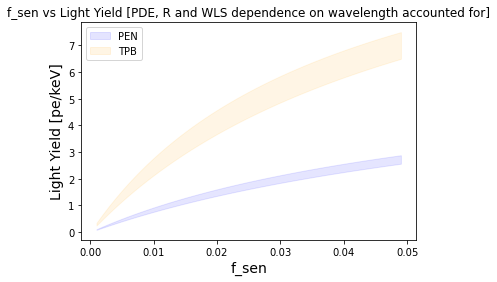

In [30]:
# fig1.close() 

fig1 = plt.figure('f_sen vs LY')
ax1 = plt.axes()
f_sen_vector = np.arange(0.001, 0.05, 0.001)
# f_sen_vector = np.arange(0.001, 1, 0.1) ### Important!! : compare this with the plot we get for same value in AMLY_V2, the maximum light yield is not obtained at maximum value of f_sen. See segreto paper. 

LY_PEN_upper = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, cenk_PDE_uniform, f_sen_vector, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_PEN_uniform)
LY_PEN_lower = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, cenk_PDE_uniform,f_sen_vector, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_PEN_uniform*0.988)
### 0.472 comes from wavelength shifting efficiency of PEN as compared to that of TPB
### 40 is the Scientillation Yield of Liquid Argon

ax1.fill_between(f_sen_vector, LY_PEN_lower, LY_PEN_upper, color='blue', alpha = 0.1, label = 'PEN')

LY_TPB_upper = 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, cenk_PDE_uniform, f_sen_vector, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_TPB_uniform)
LY_TPB_lower = 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, cenk_PDE_uniform, f_sen_vector, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_TPB_uniform*0.988)

ax1.fill_between(f_sen_vector, LY_TPB_lower, LY_TPB_upper, color='orange', alpha = 0.1, label = 'TPB')

### vertical line to show f_sen for 2PAC
# plt.axvline(0.01176, 0, 1, linestyle = 'dotted', color = 'gray', label='2PAC f_sen')

### horizontal lines correspond to the LY expected from 2PAC according to the Analytic Model
### changed f_sens from 0.01176 to 0.01 (reverted back to 0.01176)

# LY_PEN_2PAC_ref = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, cenk_PDE_uniform, 0.01176, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_PEN_uniform*0.988) 
# LY_TPB_2PAC_ref = 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, cenk_PDE_uniform, 0.01176, FF_sys, cenk_SiPM_R_uniform, cenk_R_Wall_TPB_uniform*0.988)

### Estimated values of light Yield from Analytic Model.
# plt.axhline(LY_PEN_2PAC_ref, 0, 1, linestyle = '--', color = 'blue', alpha =0.8, label='2PAC PEN (Analytic Model)')
# plt.axhline(LY_TPB_2PAC_ref, 0, 1, linestyle = '-.', color = 'orange', alpha =0.8, label='2PAC TPB (Analytic Model)')

### single point to represent 2PAC measurements, i.e, PEN and TPB Light yields
# plt.errorbar([0.01176], [2.50*0.4720], yerr = [0.05*0.4720], fmt ='*', color ='blue', label = '2PAC PEN LY (measurement) ')
# plt.errorbar([0.01176], [2.50], yerr = [0.05], fmt = '^', color ='orange', label = '2PAC TPB LY (measurement) ')

ax1.set_ylabel('Light Yield [pe/keV]' , size =14, weight = 'bold')
ax1.set_xlabel('f_sen', size =14, weight = 'bold')
ax1.set_title('f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted for]')
ax1.set_facecolor('none')
ax1.legend(loc = 'upper left')

# plt.savefig(r'C:\Users\sarth\Dropbox\Wavelength_Shifters\f_sen_vs_LC.jpeg')

<h2 style = 'color: #00FFAA'>⭕ Exporting values </h2>

In [24]:
### exporting values to share with cenk 9 July 2021

all_values_df = pd.DataFrame()

all_values_df['f_sen_vector'] = f_sen_vector
all_values_df['LY_TPB_lower'] = LY_TPB_lower
all_values_df['LY_TPB_upper'] = LY_TPB_upper

all_values_df['LY_PEN_lower'] = LY_PEN_lower
all_values_df['LY_PEN_upper'] = LY_PEN_upper

# all_values_df.head()

### adds date time stamp to filename
datetimeobj = datetime.now()
# current_filename = 'all_values_' + '-'.join(map(str, [datetimeobj.year, datetimeobj.month, datetimeobj.day])) +'.csv'
current_filename = 'all_values_' + '-'.join(map(str, [datetimeobj.year, datetimeobj.month, datetimeobj.day, datetimeobj.hour, datetimeobj.minute, datetimeobj.second, datetimeobj.microsecond])) +'.csv'

### writes data structure in file

all_values_df.to_csv(path.join(project_dir, current_filename))

<p style = 'color: #f31567; text-align: center; font-size: 24px'> 
   ⭐ THE END ⭕
</p>

In [25]:
### configurations earlier sent by Cenk


# plt.close('temp0001') 

# plt.figure('temp0001')

# f_sen_vector = np.arange(0.001, 0.05, 0.001)

# LC_PEN_upper = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform)
# LC_PEN_lower = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.988)

# plt.fill_between(f_sen_vector, LC_PEN_lower, LC_PEN_upper, color='blue', alpha = 0.1, label = 'PEN')

# LC_TPB_upper = 40*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_TPB_uniform)
# LC_TPB_lower = 40*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988)

# plt.fill_between(f_sen_vector, LC_TPB_lower, LC_TPB_upper, color='orange', alpha = 0.1, label = 'TPB')

# ### vertical line to show f_sen for 2PAC
# plt.axvline(0.01176, 0, 1, linestyle = 'dotted', color = 'gray', label='2PAC f_sen')

# ### horizontal lines correspond to the LY expected from 2PAC according to the Analytic Model
# # changed f_sens from 0.01176 to 0.01
# LC_PEN_2PAC_ref = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.01, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.988) 
# LC_TPB_2PAC_ref = 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, 0.01, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988)

# plt.axhline(LC_PEN_2PAC_ref, 0, 1, linestyle = '--', color = 'blue', alpha =0.8, label='2PAC PEN (Analytic Model)')
# plt.axhline(LC_TPB_2PAC_ref, 0, 1, linestyle = '-.', color = 'orange', alpha =0.8, label='2PAC TPB (Analytic Model)')

# ### single point to represent TPB yield
# plt.errorbar([0.01176], [2.50*0.40], yerr = [0.05*0.40], fmt ='*', color ='red', label = '2PAC PEN LY (measurement) ')
# plt.errorbar([0.01176], [2.50], yerr = [0.05], fmt = '^', color ='green', label = '2PAC TPB LY (measurement) ')

# plt.ylabel('Light Yield [pe/keV]' , size =14, weight = 'bold')
# plt.xlabel('f_sen', size =14, weight = 'bold')
# plt.title('f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted for]')
# plt.legend(loc = 'upper left')

# plt.savefig(r'C:\Users\sarth\Dropbox\Wavelength_Shifters\f_sen_vs_LC.jpeg')